<font size="6"><b>BASH: THE LINUX SHELL</b></font>

![xkcd](../imagesbb/tar.png)

(https://xkcd.com/1168)

In this notebook, basic Linux tools and commands that can be accessed from Bash shell are introduced, along with some of the basic features of shell programming.

In fact Bash is a kind of scripting language.

Note that the kernel of this notebook - as you can see from top right corner - is not `R` but `Bash`. So the commands in code cells are executed in Bash

The purpose here is not to make you memorize all features but the provide a showcase of useful utilities in Linux shell and show the parsimony, beauty and variety of those utilities.

This will serve as a reference material.

# First steps

## Journey to Linux: Breaking Windows habits

<!--In ![](https://thgtr.com/wp-content/uploads/2009/10/windows_logo.jpg.png =10x)
https://thgtr.com/wp-content/uploads/2009/10/windows_logo.jpg.png
https://openclipart.org/download/250889/Pinguino-Linux.svg
-->

<img src="../imagesbb/windows" width="100"><img src="../imagesbb/tux" width="100">

<img src="../imagesbb/windows" width="20"> We have letters for drives/volumes and each drive has its own root as such: C:\, D:\ .. 

<img src="../imagesbb/tux" width="20"> We have a single filesystem root "/" and all drives/volumes are "mounted" under this root

<img src="../imagesbb/windows" width="20"> Directories are separated by backslashes "\\"

<img src="../imagesbb/tux" width="20"> Directories are separated by slashes "/". Backslash is an escape character to toggle between literal and special usages of some characters

<img src="../imagesbb/windows" width="20"> Directory and filenames are case insensitive: "path" and "PATH" are the same

<img src="../imagesbb/tux" width="20"> Directory and filenames are case sensitive: "path" and "PATH" are different and can co-exist

<img src="../imagesbb/windows" width="20"> In Windows tradition, directory and filenames contain many spaces since it does not matter in GUI usage

<img src="../imagesbb/tux" width="20"> In Linux tradition, whitespaces are avoided as much as possible because they may cause trouble for shell commands

<img src="../imagesbb/windows" width="20"> GUI's are the main interface for interaction with the OS

<img src="../imagesbb/tux" width="20"> [A true Linux/Unix "hacker"](http://www.catb.org/jargon/html/appendixc.html) prefers the terminal/CLI/shell (the black screen) for many good reasons!

So:

<img src="../imagesbb/tuxwin" width="500">

## The Shell and screen command

<!--<img src="https://static01.nyt.com/images/2018/05/15/arts/01hal-voice1/merlin_135847308_098289a6-90ee-461b-88e2-20920469f96a-superJumbo.jpg?quality=90&auto=webp" width="300">-->

- The shell is the command interpreter of Unix/Linux systems
- The terminal is the windows program that a shell works on in desktop environments
- When we work in a virtual terminal, no need for a separate terminal program, everything IS inside the terminal. Try it yourself if you are on a \*nix PC: Ctrl+Alt+F2 and login! And back here with Ctrl+Alt+F1
- Together we call this mode of interaction with the OS "Command Line Interface" or CLI

In Stanley Kubrick's sci-fi classic 2001: A Space Odyssey, an AI interface to the main computer of the spaceship looked and talked like that:

[![](https://img.youtube.com/vi/7qnd-hdmgfk/0.jpg)](https://www.youtube.com/watch?v=7qnd-hdmgfk)

Hopefully the shell we use, BASH, do not refuse our requests arbitrarily, as HAL does to Dave

In an SoS notebook, in order to invoke Bash (send a command to be interpreted with Bash), type the command to a cell with "Bash"at the right and hit Enter: 

In [ ]:
# Hello the commands you type and enter here are interpreted by Bash
# But statements that start with a hash sign "#" are comments not interpreted at all
# So that's a comment that tells about comments!

We can also invoke Bash through a terminal.

In \*ubuntu distros, Ctrl+Alt+T is the default shortcut to invoke a terminal window. If you are on an \*ubuntu system, try it yourself, and to close it type "exit"

Now let's open a terminal from inside Jupyter/binder by clicking on the plus sign - the new launcher - to the left of the toolbar and click on the black terminal icon with the \$ sign:

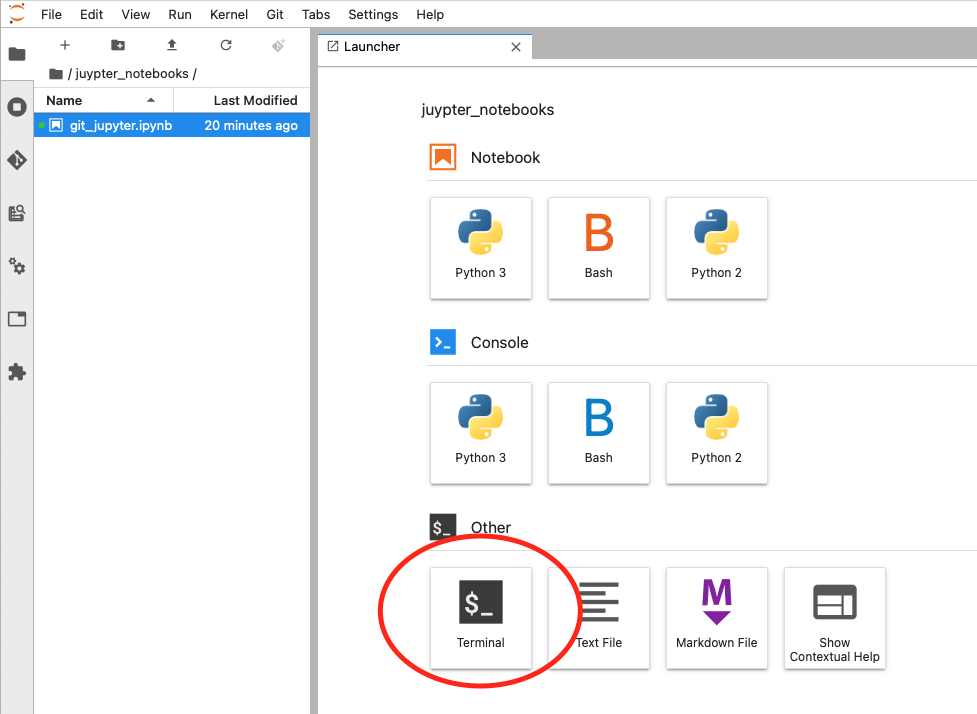

Now please copy and paste the below command inside that terminal:

```Bash
screen -S 1
```

A very powerful utility called "screen" is automatically opened inside the terminal

From now on, we can send commands to the terminal from this Jupyter notebook using the utility called "GNU Screen".

We will come to screen later, however, what it does are:
- To multiplex many shell instances inside a session
- To attach and detach to an ongoing process, from local and from remote hosts (think that you were disconnected from a remote computer, you want to reconnect and resume from where you were last. screen does that)
- To send commands to other shell instances easily

Note that, it may take some time for the screen inside terminal to be operational. We will go on and return back to screen terminal in order to send and execute some of our codes to terminal ...

And this code is getting the appropriate parameter in order to send remote commands to terminal from here:

(content not important for the time being)

In [ ]:
#scr=$(screen -ls 2> /dev/null | grep -Po "^.+(?=\.jupyter)" | head -1 | tr -d "\t")
scr=$(screen -ls | grep -P "Attached" | head -1 | grep -Po "^\t+.+?(?=\s|\t)" | tr -d "\t")
echo $scr

## Get info on commands

We do not usually memorize all usage details of all commands. We can access this info whenever we want:

To get a one-liner explanation, use `whatis`. However this system is minimized so some commands do not run, `whatis` is such a command:

In [ ]:
# whatis ls

To get most verbose info use `man`. For the same reason that the system is minimized, `man` does not run either:

In [ ]:
# man ls

And best of both worlds, info on most common usages is provided by `tldr`:

In [ ]:
tldr ls

In [ ]:
tldr tldr

Note that, tldr is not a standard utility in \*nix system and you have to install it as an npm package separately. It is a community project and it may not cover many lesser known utilities/programs

And for screen:

In [ ]:
tldr screen

# Basic commands

## ls command

In [ ]:
tldr ls

We see that, most common flags are:
- a: all incl. hidden
- l: long and detail
- h: human readable units
- S: size sorted
- t: time sorted
- r: reverse sorted
- 1: one file per line (default in l)

Let's list the contents of the root directory, with details and time sorted:

In [ ]:
ls -lt /

## echo command

In [ ]:
tldr echo

## glob "*"

Generalizes actions by pattern matching:

In [ ]:
ls -l ./*.ipynb

## ">" redirect

">" redirect operator "redirects" the standard input (stdin) from a command into a file (and saves)
">>" appends, ">" overwrites

In [ ]:
echo "Hello World" > ~/databb/temp/helloworld
echo "Hello World a second time" > ~/databb/temp/helloworld # this will overwrite the file
echo "Hello World a third time" >> ~/databb/temp/helloworld # this will append the file

In [ ]:
ls ~/databb/temp/helloworld

We see the file is there, but how can see the contents?

## cat command

Cat "concatenates" or combines and prints the contents of the files provided as arguments.

Cat writes the contents of a file to stdout (that can be printed to shell, redirected to a file or a pipe):

In [ ]:
tldr cat

Let's view the main file for configuration, environment and options of the Bash shell for the current user:

In [ ]:
cat ~/.bashrc

## wc command

Most of the time, we may be in a need to get the row/word/character/byte count of the output of a previous command

In [ ]:
tldr wc

See how many files/directory there are instantly under the root directory:

In [ ]:
ls / | wc -l

We are ok with "ls /" and "wc -l" parts, but what about that strange "|" sign?

## Unix pipe

Unix pipe "|" is a structure in Unix-like OS's, that redirects the standard output (stdout) of a former command into the standard input (stdin) of a latter command

In [ ]:
ls / | cat -n

The first process writes the contents of the root /, and the output is fed into the input of "cat" with "n" flag for line numbers

So the command takes the raw input and adds line numbers. See how many files

In [ ]:
ls / | wc -l

First process does the same thing, second counts the lines in the input

Pipe is very powerful and simplifies complex data and workflows!

You'l create killer one-liners that does a lot of things using multiple pipes!!!

## Environment variables, which command

In our workflow we may refer to same paths and filenames many times, and some values and parameters may be selected once and referred to in many places

It is better that we define them once in an environment variable and refer by that variable name:

First, some built-ins:

In [ ]:
echo $HOME # echoes the value of HOME env variable
echo ~ # tilde is a shorthand for HOME
echo $PATH # echoes the value of PATH env variable

$PATH is where the OS looks for the executable files in return for a command

For example when we just type "ls", we do not specify the exact location of the "ls" executable. The exact path of the executable file that ls command invokes is given by `which`:

In [ ]:
tldr which

In [ ]:
which ls

To list the details of that file:

In [ ]:
ls -l `which ls`

The backticks execute the command inside and provide the output as an argument. The same is done with:

In [ ]:
ls -l $(which ls)

\$(...) notation executes the command inside and saves it as a temporary variable to be used as arguments

Apart from /bin/ls, for all ls executables in whole $PATH locations:

In [ ]:
which -a ls

- Now let's define the path to data directory, just under the \$HOME.
- Note that we do not use the "$" when the variable is on the LHS to an assignment:

In [ ]:
datadir=~/databb

Now let's check the value (with "$"):

In [ ]:
echo $datadir
ls $datadir

## column, head, tail commands

To align tab separated columns, `column` is used:

In [ ]:
tldr column

In [ ]:
cat ~/databb/csv/iris.tsv | column -t

To get only the first n lines use `head`:

In [ ]:
tldr head

In [ ]:
cat ~/databb/csv/iris.tsv | head -3 | column -t

To trim lines from the end:

In [ ]:
cat ~/databb/csv/iris.tsv | head -n-50 | column -t

To get only the last n lines, use `tail`:

In [ ]:
tldr tail

In [ ]:
cat ~/databb/csv/iris.tsv | tail -3 | column -t

To trim lines from the beginning:

In [ ]:
cat ~/databb/csv/iris.tsv | tail -n+100 | column -t

## mkdir, cp, rm commands

`mkdir` creates a new directory

In [ ]:
tldr mkdir

`-p` flag creates non-existing parents and do not return an error if the directories exist:

In [ ]:
mkdir -p ~/databb/temp/somenewfolder/childofsomenewfolder

In [ ]:
ls ~/databb/temp/*/**

We can create a copy of a file (or directory) with copy

In [ ]:
tldr cp

In [ ]:
cp -n ~/databb/csv/iris.tsv ~/databb/temp/iris3.tsv

Note that "n" flag is "no-clobber" which stands for "do not overwrite existing files"

In [ ]:
ls ~/databb/temp

And we can remove a file or folder

In [ ]:
tldr rm

In [ ]:
rm ~/databb/temp/iris3.tsv

In [ ]:
ls ~/databb/temp

To remove a directory `-r` flag must be passed:

In [ ]:
rm -r ~/databb/temp/somenewfolder

In [ ]:
ls ~/databb/temp

## gzip, gunzip, sha256sum

A file can be compressed with `gzip`.

To create a new gzip file at the location of the original file and keeping the original file:

In [ ]:
tldr gzip

`yes` passes an answer to "overwrite?" question without waiting for user prompt:

In [ ]:
cp -n ~/databb/csv/iris.tsv ~/databb/temp/iris.tsv

In [ ]:
yes n | gzip -k ~/databb/temp/iris.tsv

In [ ]:
ls ~/databb/temp

Or redirect the binary stream into a designated new filepath with `-c` flag:

In [ ]:
gzip -c ~/databb/temp/iris.tsv > ~/databb/temp/iris2.tsv.gz

To see whether the two files have exactly the same binary content, use `sha256sum`:

In [ ]:
tldr sha256sum

In [ ]:
sha256sum ~/databb/temp/iris.tsv.gz

In [ ]:
sha256sum ~/databb/temp/iris2.tsv.gz

An decompress the compressed file discarding the original gzipped file:

In [ ]:
tldr gunzip

In [ ]:
gunzip ~/databb/temp/iris2.tsv.gz

In [ ]:
ls ~/databb/temp

Check again the files have exactly the same binary content:

In [ ]:
sha256sum ~/databb/temp/iris.tsv

In [ ]:
sha256sum ~/databb/temp/iris2.tsv

## less, zcat, zless commands

In order to page through a text file (even a very large file) without overwhelming the memory use `less`, 

In [ ]:
tldr less

Since less is an interactive program, it cannot be used here on a jupyter notebook cell, we need a terminal screen.

We direct the command to a screen session:

In [ ]:
scr=$(screen -ls | grep -P "Attached" | head -1 | grep -Po "^\t+.+?(?=\s|\t)" | tr -d "\t")
screen -S $scr -X stuff "less -N ~/databb/temp/iris.tsv\n"

Now check the terminal screen with screen command running on

To get the contents of a gzipped file, use `zcat`

In [ ]:
tldr zcat

In [ ]:
zcat ~/databb/temp/iris.tsv.gz | head -5 | column -t

And to page through a gzipped file on the terminal use `zless`

Since less is an interactive program, it cannot be used here on a jupyter notebook cell, we need a terminal screen.

We direct the command to a screen session:

In [ ]:
tldr zless

In [ ]:
scr=$(screen -ls | grep -P "Attached" | head -1 | grep -Po "^\t+.+?(?=\s|\t)" | tr -d "\t")
screen -S $scr -X stuff "zless -N ~/databb/temp/iris.tsv.gz\n"

Now check the terminal screen with screen command running on

## numfmt command

`numfmt` formats numbers into a more human readable form:

In [ ]:
tldr numfmt

In [ ]:
echo "1000000000" | numfmt --to=si

## seq command

`seq` creates a sequence of numbers:

In [ ]:
seq 2 2 20

## arithmetics with $((...))

You can do arithmetic operations on the spot:

In [ ]:
echo $((1 + 1))

## Capture the output with $(...) and \`...\`

With these two notations output of commands can be embedded in other commands: 

In [ ]:
echo "$(seq 2 2 20)"

In [ ]:
echo "`seq 2 2 20`"

## printf command

`printf` provides a better and more fine tuned control over printing of text as compared to echo:

In [ ]:
tldr printf

In [ ]:
printf "%02d\n" `seq 2 2 20`

## find command

`find` is a very powerful command to find files and directories with many arguments and also provide the ability to execute commands on the results:

In [ ]:
tldr find

Find only files (not directories) under the current directory at at most 2 depths of directory recursion and modified in the last 5 minutes and calculate the number of lines in these files:

In [ ]:
find . -maxdepth 2 -type f -name "*.ipynb" -mmin -5 -exec wc -l "{}" \;

## xargs, parallel commands

`xargs` is like the `sapply` function in R: It creates an implicit loop on the inputs:

In [ ]:
tldr xargs

In [ ]:
find . -maxdepth 2 -type f -name "*.ipynb" -mmin -5

In [ ]:
find . -maxdepth 2 -type f -name "*.ipynb" -mmin -5 | xargs -i wc -l "{}"

`parallel` works in a similar way but can execute in multiple parallel thread for better performance.

Find the files, print the names of files, count the number of lines and print in human-readable format:

In [ ]:
find . -maxdepth 2 -type f -name "*.ipynb" -mmin -5 | \
    parallel -k -j0 'printf "%s\t" {}; cat {} | wc -l | numfmt --to=si' | \
    column -t

## grep command

`grep` finds patterns in files with regex and is one of the most powerful commands in the Unix toolset:

In [ ]:
tldr grep

Return lines that start with 5:

In [ ]:
grep -P "^5" ~/databb/csv/iris.tsv

Return the patterns with 5 followed by any number of digits at the beginning of the lines:

In [ ]:
grep -Po "^5\\d*" ~/databb/csv/iris.tsv

## awk command

`awk` can make columnwise operations on text streams, so it is a simple and Bash version of data.table:

In [ ]:
tldr awk

Return the whole lines where the second column is larger than 5

In [ ]:
awk -F "\t" '$2 > 5 {print $0}' ~/databb/csv/iris.tsv

## sed command

`sed` is like grep but has many additional capabilities like substituting patterns, deleting, inserting and appending lines and combining pattern search and those operations:

Add xxx in front of the last word of the lines which start with 1:

In [ ]:
sed '/^1/ s/\(\w\+\)$/xxx\1/g' ~/databb/csv/iris.tsv

## sort, uniq commands

`sort` does what it does with some options:

## tr command

`tr` changes, deletes or squeeze all instances of a single character:

In [ ]:
tldr tr

Change 2 and 1 with 0:

In [ ]:
seq 2 2 20 | tr 2 0 | tr 1 0

Delete all zeros:

In [ ]:
seq 2 2 20 | tr 2 0 | tr 1 0 | tr -d 0

Squeeze all zeros:

In [ ]:
seq 2 2 20 | tr 2 0 | tr 1 0 | tr -s 0

## sort command

In [ ]:
tldr sort

Reverse sort in alphanumeric order:

In [ ]:
seq 2 2 20 | sort -n

Reverse sort in numeric order:

In [ ]:
seq 2 2 20 | sort -nr

Sort and return unique values:

In [ ]:
seq 2 2 20 | tr 2 0 | tr 1 0 | sort -u

## uniq

`uniq` returns unique values from sorted streams, and can also return the frequencies of those values:

In [ ]:
tldr uniq

In [ ]:
seq 2 2 20 | tr 2 0 | tr 1 0 | sort | uniq -c

## ps command

To get details on ongoing processes on the operating system:

In [ ]:
tldr ps

For example, list "python" processes:

In [ ]:
ps aux | grep python

## du command

"ls" does not report the recursive size of directories, for this you may use du (disk usage)

In [ ]:
tldr du

In [ ]:
du -sh ~/databb/*

## df command

To get information on mounted file systems, use df:

In [ ]:
tldr df

To list mounted file systems, with file types and human readable sizes:

In [ ]:
df -hT

## curl

`curl` can send any kind of HTTP request and get its response.

In short it can simulate every kind of traffic that passes through a browser:

In [ ]:
tldr curl

Get the public ip:

In [ ]:
curl ipecho.net/plain

## wget

`wget` downloads a file.

In [ ]:
tldr wget

In [ ]:
wget -O ~/databb/temp/wiki.html https://en.wikipedia.org

With proper options, it can even act as a spider to download everything in a website, following links.

## w3m

`w3m` is a terminal based browser.

In [ ]:
tldr w3m

It can also render an html file as plain text:

In [ ]:
cat ~/databb/temp/wiki.html | w3m -dump -T text/html | head -50

## lynx

`lynx` is also a terminal based browser.

In [ ]:
tldr lynx

It has some useful features such as extracting all links in a local html file or webpage:

In [ ]:
lynx -listonly -nonumbers -dump https://en.wikipedia.org | head -50

## tar

`tar` creates a single archive file from a directory. It can also be zipped:

In [ ]:
tldr tar

Create a tarball of the current directory:

In [ ]:
tar -czvf ~/databb/temp/06_database.tar.gz .

In [ ]:
ls ~/databb/temp/*.tar.gz

Untar into a new directory_:

In [ ]:
mkdir -p ~/databb/temp/06_database

In [ ]:
tar -xzvf ~/databb/temp/06_database.tar.gz -C ~/databb/temp/06_database

In [ ]:
ls -l ~/databb/temp/06_database

Now you are luckier than the characters in the comic strip at the top!

# Programming structures

## for loop

Repeat the same action on multiple inputs

In [ ]:
for i in ~/databb/*;
do
    ls -l $i
done

## while loop

Repeats an action as long as a logical condition holds true 

In [ ]:
i=0

while [ $i -lt 10 ]; # means while i is less than 10
do
    echo $i;
    i=$(( $i + 1 )) # that is for an arithmetic operation for incrementing
done

## if.. else

To test a condition and make an action on the result

In [ ]:
if [[ 1 == 1 ]];
then
    echo "they are equal";
else
    echo "they are not equal";
fi

In [ ]:
if [[ 1 == 2 ]];
then
    echo "they are equal";
else
    echo "they are not equal";
fi

## shell functions

Create a function similar to function in R, which takes arguments and return values. Note that arguments are referred to by position:

In [ ]:
exists()  if [ -e $1 ]; then echo "true"; else echo "false"; fi

In [ ]:
exists ~/databb/csv/iris.tsv

In [ ]:
exists ~/databb/csv/iris5.tsv

# Resources

- The Linux Documentation Project is very good resource for learning GNU/Linux and Bash programming:

https://www.tldp.org

- I especially recommend "Advanced Bash-Scripting Guide" if you are serious in learning Bash programming and Linux in general: 

https://tldp.org/LDP/abs/html/index.html

- "Data science at the command line" is also a great online book for learning Bash programming with a focus on data science tasks:

https://datascienceatthecommandline.com/

https://jeroenjanssens.com/dsatcl/

- The 14th to 30th videos in "Data Science Productivity Tools" YouTube watchlist by Dede Delianur has concise explanations of basic Linux and Bash concepts:

https://www.youtube.com/watch?v=pgLaumL_FWY&list=PL9WbRqSWZ_OvVcoVGmvAEWzEDJF9OFzf5&index=14